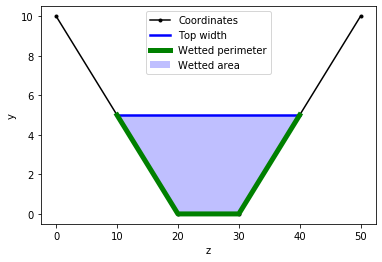

In [1]:
%matplotlib inline

from pantherapy.panthera import CrossSection


y_xs = [10, 0, 0, 10]
z_xs = [0, 20, 30, 50]
roughness = 0.030

depth = 5

xs = CrossSection(y_xs, z_xs, roughness)
_ = xs.plot(depth)

In [2]:
slope = 0.001
flow = xs.normal_flow(depth, slope)
flow

223.6318490463902

In [3]:
xs.normal_depth(flow, slope)

5.000000021038301

In [4]:
xs.critical_depth(flow)

3.0117866231162354

In [5]:
import numpy as np

from pantherapy.reach import Reach
from pantherapy.steady.flow import SteadyFlow


stream_distance = np.linspace(0, 10e3, num=200)
thalweg = stream_distance[::-1]*slope

reach = Reach()

for x, y in zip(stream_distance, thalweg):
    reach.put(xs, x, y)

flow_data = SteadyFlow()
flow_data.set_flow(0, flow)

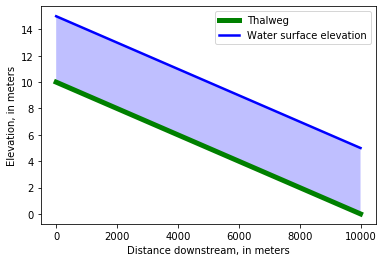

In [6]:
from pantherapy.steady.initialvalue import InitialValuePlan
from pantherapy.relation import NormalRelation


boundary_condition = NormalRelation(xs, slope)
boundary_location = 'downstream'
plan = InitialValuePlan(reach, flow_data, boundary_location, boundary_condition)
solution = plan.solve()
_ = solution.plot()

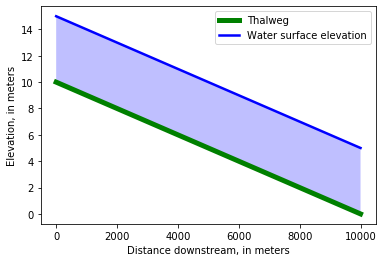

In [7]:
boundary_condition = NormalRelation(xs, slope, thalweg[0])
boundary_location = 'upstream'
plan = InitialValuePlan(reach, flow_data, boundary_location, boundary_condition)
solution = plan.solve()
_ = solution.plot()

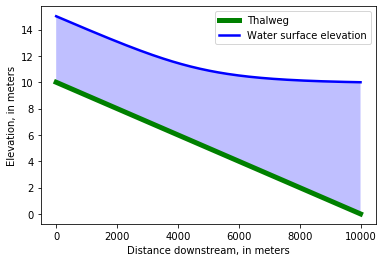

In [8]:
from pantherapy.relation import FixedStageRelation


boundary_location = 'downstream'
boundary_condition = FixedStageRelation(10)
plan = InitialValuePlan(reach, flow_data, boundary_location, boundary_condition)
solution = plan.solve()
_ = solution.plot()

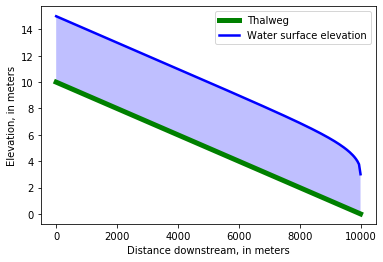

In [9]:
from pantherapy.relation import CriticalRelation


boundary_condition = CriticalRelation(xs, thalweg[-1])
plan = InitialValuePlan(reach, flow_data, boundary_location, boundary_condition)
solution = plan.solve()
_ = solution.plot()